In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("diabates.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

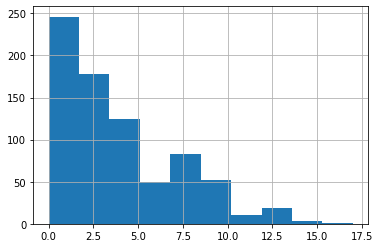

In [7]:
df['Pregnancies'].hist()

<AxesSubplot:>

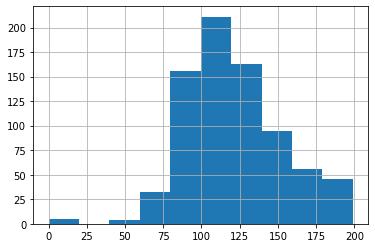

In [8]:
df['Glucose'].hist()

<AxesSubplot:>

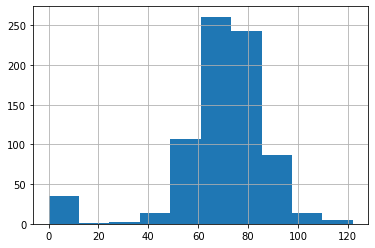

In [9]:
df['BloodPressure'].hist()

<AxesSubplot:>

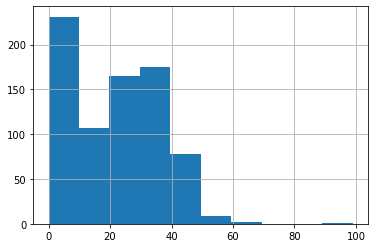

In [10]:
df['SkinThickness'].hist()

<AxesSubplot:>

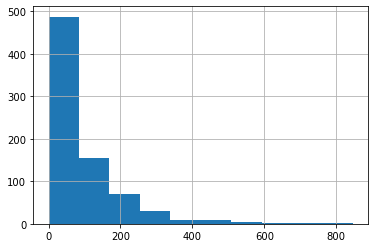

In [11]:
df['Insulin'].hist()

<AxesSubplot:>

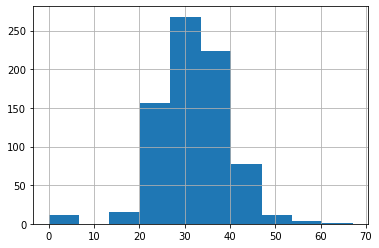

In [12]:
df['BMI'].hist()

<AxesSubplot:>

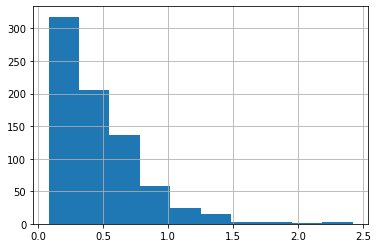

In [13]:
df['DiabetesPedigreeFunction'].hist()

<AxesSubplot:>

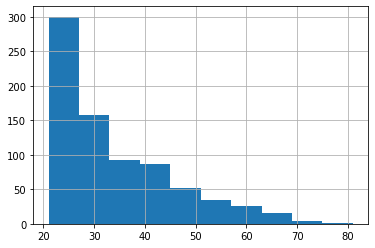

In [14]:
df['Age'].hist()

<AxesSubplot:>

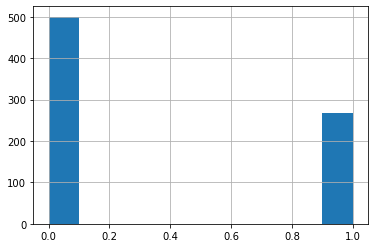

In [15]:
df['Outcome'].hist()

In [16]:
from sklearn.model_selection import train_test_split
#train 70
#test 30
x=df.drop(columns=['Outcome'])
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression
Lr_model=LogisticRegression()
Lr_model.fit(x_train, y_train)

LogisticRegression()

LogisticRegression()

In [19]:
y_pred=Lr_model.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)



array([[137,  15],
       [ 29,  50]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.810


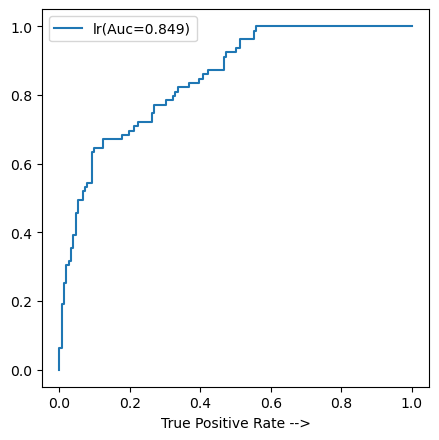

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred=Lr_model.decision_function(x_test)
lr_fpr,lr_tpr, threshold = roc_curve(y_test,y_pred)
lr_auc=auc(lr_fpr,lr_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(lr_fpr, lr_tpr,linestyle='-',label='lr(Auc=%0.3f)'%lr_auc)
plt.xlabel('False Positive Rate -->')
plt.xlabel('True Positive Rate -->')
plt.legend()
plt.show()